In [101]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
%matplotlib inline

data = pd.read_csv('covid_data_22-09-2021_2.csv')
print(data.shape)
data.head()

(149, 13)


,Unnamed: 0,Country,Confirmed,proportion infected,Deaths,GDP,Population Density,2021 Population,Area,Literacy,Employment,Population 65 +,Foreigners
0,0,Albania,165096,5746.60,2601,14.80,100,2872933,28748,0.972489,0.707484,0.147591,0.018337
1,1,Algeria,202122,453.02,5739,145.00,19,44616624,2381741,0.774214,0.896187,0.053393,0.003512
2,2,Antigua and Barbuda,2625,2658.74,57,1.42,223,98731,442,0.990000,0.994403,0.088592,0.296995
3,3,Argentina,5245265,11501.30,114684,383.00,16,45605826,2780400,0.980849,0.938704,0.116861,0.045017
4,4,Armenia,254709,8581.47,5181,12.65,100,2968127,29743,0.996145,0.783675,0.119087,0.065531


In [102]:
x = data['proportion infected']
y1 = data['Literacy']

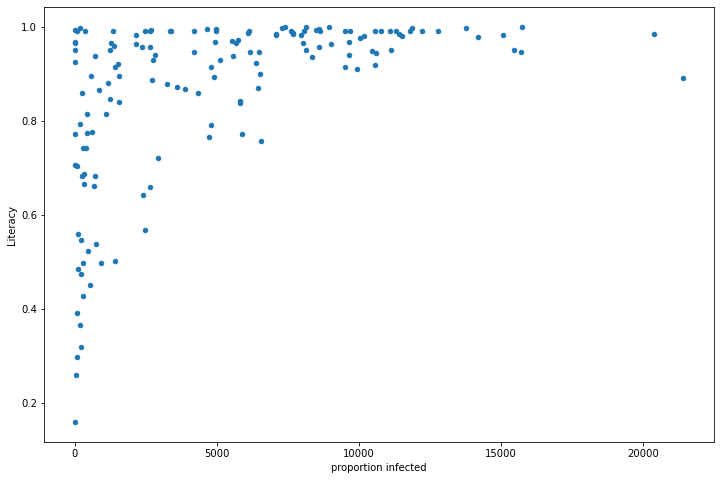

In [103]:
data.plot(kind = 'scatter', x = 'proportion infected', y = 'Literacy',figsize=(12,8))
plt.show()

In [104]:
# test train split, proportion infected and Literacy
X_train, X_test, y1_train, y1_test = train_test_split(x,y1)

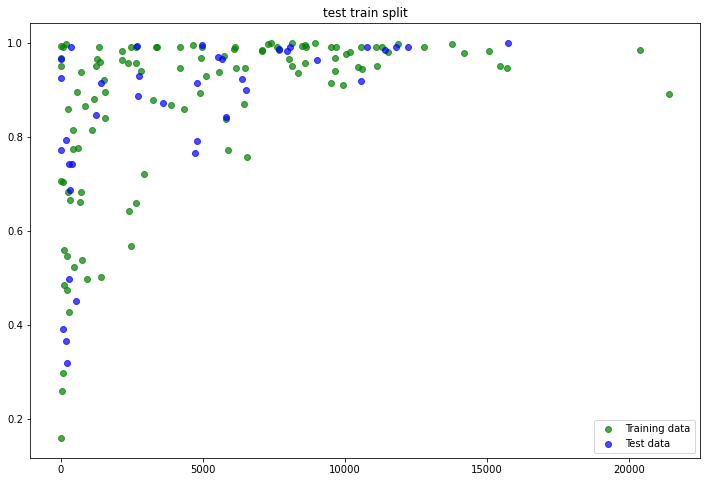

In [105]:
# visualization of proportion infected and Literacy
plt.figure(figsize=(12,8))
plt.scatter(X_train, y1_train, label="Training data", color="g", alpha=.7)
plt.scatter(X_test, y1_test, label="Test data", color="b", alpha=.7)
plt.legend()
plt.title('test train split')
plt.show()

In [106]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
degree=3
polyreg_scaled=make_pipeline(PolynomialFeatures(degree),scaler,LinearRegression())
polyreg_scaled.fit(X_train.values.reshape(-1,1), y1_train.values)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

<function matplotlib.pyplot.show(close=None, block=None)>

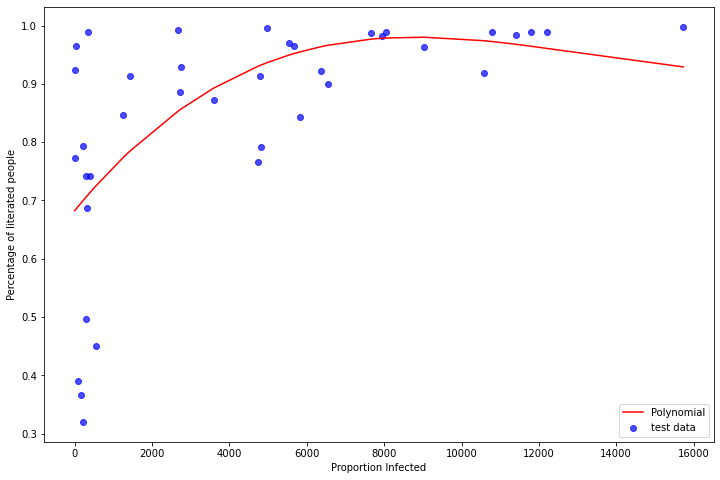

In [108]:
# predict proportion infected & Literacy
prediction1 = polyreg_scaled.predict(X_test.values.reshape(-1,1))

idx   = np.argsort(X_test)

X_test2 = np.array(X_test)[idx]
prediction1 = np.array(prediction1)[idx]
# plot of prediction
plt.figure(figsize=(12,8))
plt.plot(X_test2, prediction1, label='Polynomial', color='r')
plt.scatter(X_test, y1_test, label='test data', color='blue', alpha=.7)
plt.xlabel('Proportion Infected')
plt.ylabel('Percentage of literated people')
plt.legend()
plt.show

In [109]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# model evaluation for training set:
y_train_predict = polyreg_scaled.predict(X_train.values.reshape(-1,1))
rmse = (np.sqrt(mean_squared_error(y1_train, y_train_predict)))
r2 = r2_score(y1_train.values.reshape(-1,1), y_train_predict)

print("The model performance for training set:")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set:
y1_test_predict = polyreg_scaled.predict(X_test.values.reshape(-1,1))
rmse = (np.sqrt(mean_squared_error(y1_test, y1_test_predict)))
r2 = r2_score(y1_test.values.reshape(-1,1), y1_test_predict)

print("The model performance for testing set:")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))


The model performance for training set:
--------------------------------------
RMSE is 0.14301410861475247
R2 score is 0.37558901515792886


The model performance for testing set:
--------------------------------------
RMSE is 0.14734361779754857
R2 score is 0.4027993917735837


In [110]:
polyreg_scaled.score(X_test.values.reshape(-1,1), y1_test.values)

0.4027993917735837